Process All Stations
============

Using the MTA turnstile data, we want to find weekly in- and out-flow from the stations for the last three years and use that as a judge for what demand is necessary and where.

In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import process

In [2]:
!ls modern

turnstile_141018.txt  turnstile_150905.txt  turnstile_160723.txt
turnstile_141025.txt  turnstile_150912.txt  turnstile_160730.txt
turnstile_141101.txt  turnstile_150919.txt  turnstile_160806.txt
turnstile_141108.txt  turnstile_150926.txt  turnstile_160813.txt
turnstile_141115.txt  turnstile_151003.txt  turnstile_160820.txt
turnstile_141122.txt  turnstile_151010.txt  turnstile_160827.txt
turnstile_141129.txt  turnstile_151017.txt  turnstile_160903.txt
turnstile_141206.txt  turnstile_151024.txt  turnstile_160910.txt
turnstile_141213.txt  turnstile_151031.txt  turnstile_160917.txt
turnstile_141220.txt  turnstile_151107.txt  turnstile_160924.txt
turnstile_141227.txt  turnstile_151114.txt  turnstile_161001.txt
turnstile_150103.txt  turnstile_151121.txt  turnstile_161008.txt
turnstile_150110.txt  turnstile_151128.txt  turnstile_161015.txt
turnstile_150117.txt  turnstile_151205.txt  turnstile_161022.txt
turnstile_150124.txt  turnstile_151212.txt  turnstile_161029.txt
turnstile_150131.txt  tur

In [3]:
processed = sorted(os.listdir('../stations'))
processed = [*processed[:-3], processed[-1]]
processed

['103 ST_6.csv',
 '110 ST_6.csv',
 '116 ST_6.csv',
 '125 ST_456.csv',
 '86 ST-2 AVE_Q.csv',
 '86 ST_456.csv',
 '96 ST-2 AVE_Q.csv',
 '96 ST_6.csv',
 'LEXINGTON_FULL.csv']

In [3]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

database = 'stations'
user = 'mikemoran'

In [7]:
engine = create_engine(f'postgres://{user}@localhost/{database}')
if not database_exists(engine.url):
    create_database(engine.url)

In [10]:
for filename in processed:
    df = pd.read_csv(f'stations/{filename}', header=0)
    table_name = df.iloc[0].station.replace(' ', '_')
    df.to_sql(table_name, engine, if_exists='replace')

In [12]:
green_456 = [('125 ST', '456'),
             ('116 ST', '6'),
             ('110 ST', '6'),
             ('103 ST', '6'),
             ('96 ST', '6'),
             ('86 ST', '456')]
yellow_q = [('96 ST-2 AVE', 'Q'),
            ('86 ST-2 AVE', 'Q')]
all_stations = [*green_456, *yellow_q,
                ('LEXINGTON AV/63', 'F'),
                ('LEXINGTON AVE', 'NQR456')]
all_stations

[('125 ST', '456'),
 ('116 ST', '6'),
 ('110 ST', '6'),
 ('103 ST', '6'),
 ('96 ST', '6'),
 ('86 ST', '456'),
 ('96 ST-2 AVE', 'Q'),
 ('86 ST-2 AVE', 'Q'),
 ('LEXINGTON AV/63', 'F'),
 ('LEXINGTON AVE', 'NQR456')]

In [4]:
import process

test = process.main('77 ST', '6')
test.head()

77_ST_6


,d_entries,d_exits,station,line
date,,,,
2015-01-01,15109.0,14597.0,77 ST,6
2015-01-02,27183.0,26505.0,77 ST,6
2015-01-03,19250.0,19235.0,77 ST,6
2015-01-04,15060.0,14926.0,77 ST,6
2015-01-05,34694.0,32845.0,77 ST,6


In [6]:
g77 = test
g68 = process.main('68ST-HUNTER CO', '6')
second72 = process.main('72 ST-2 AVE', 'Q')

68ST-HUNTER_CO_6
72_ST-2_AVE_Q


In [11]:
g77.reset_index(inplace=True)
g77.head()

,date,d_entries,d_exits,station,line
0,2015-01-01,15109.0,14597.0,77 ST,6
1,2015-01-02,27183.0,26505.0,77 ST,6
2,2015-01-03,19250.0,19235.0,77 ST,6
3,2015-01-04,15060.0,14926.0,77 ST,6
4,2015-01-05,34694.0,32845.0,77 ST,6


In [18]:
new_stations = ['68ST-HUNTER_CO_6.csv',
                '72_ST-2_AVE_Q.csv',
                '77_ST_6.csv']
table_names = ['g68', 'second72', 'g77']

for filename, table in zip(new_stations, table_names):
    df = pd.read_csv(f'stations/{filename}', header=0)
    df.to_sql(table, engine, if_exists='replace')

In [17]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

database = 'stations'
user = 'mikemoran'

engine = create_engine(f'postgres://{user}@localhost/{database}')
if not database_exists(engine.url):
    create_database(engine.url)

for name, frame in zip(['g77', 'g68', 'second72'], [g77, g68, second72]):
    frame.to_sql(name, engine, if_exists='replace')

In [4]:
# test_frame['station'] = '125 ST'
# test_frame['line'] = '456'
# restrict = test_frame.loc[test_frame.index >= '2015-01-01 00:00:00']
test_frame.head()

,d_entries,d_exits,station,line
date,,,,
2016-12-31,10.0,188.0,86 ST-2 AVE,Q
2017-01-01,12207.0,9897.0,86 ST-2 AVE,Q
2017-01-02,14395.0,12385.0,86 ST-2 AVE,Q
2017-01-03,16764.0,14033.0,86 ST-2 AVE,Q
2017-01-04,18827.0,14247.0,86 ST-2 AVE,Q


In [3]:
lex = turnstile_process.main(*all_stations[-1])
lex.head()

LEXINGTON_AV_63_F
reducing to daily ridership


,d_entries,d_exits,station,line
date,,,,
2015-12-26,2966.0,3279.0,LEXINGTON AV/63,F
2015-12-27,3055.0,3063.0,LEXINGTON AV/63,F
2015-12-28,7636.0,6207.0,LEXINGTON AV/63,F
2015-12-29,8090.0,6576.0,LEXINGTON AV/63,F
2015-12-30,7714.0,6439.0,LEXINGTON AV/63,F


/opt/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


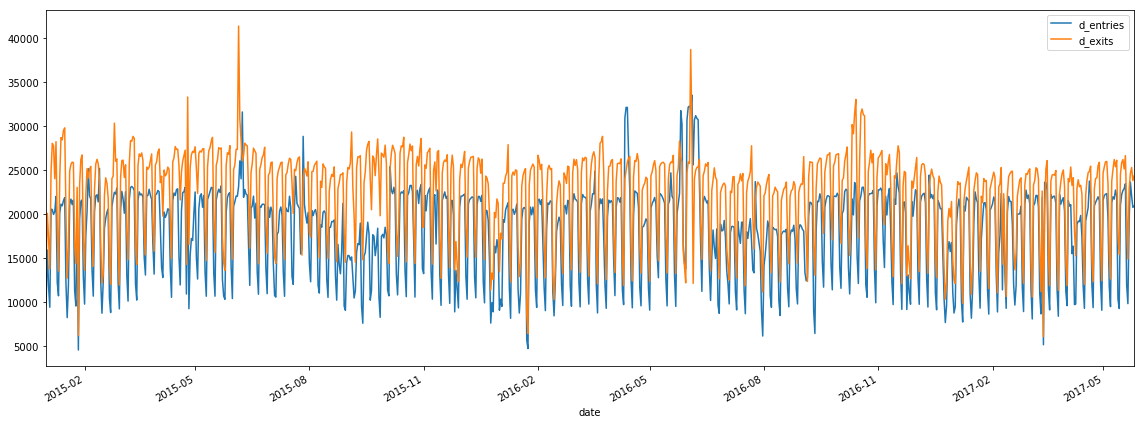

In [21]:
restrict.plot(y=['d_entries', 'd_exits'], figsize=(16, 6))

/opt/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


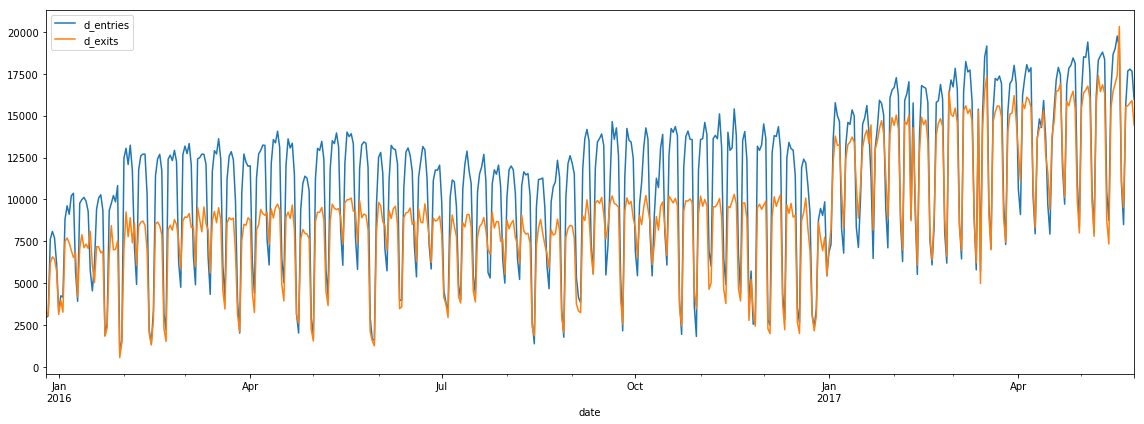

In [4]:
lex.plot(y=['d_entries', 'd_exits'], figsize=(16, 6))

In [14]:
lex2 = turnstile_process.main(*all_stations[-1])

LEXINGTON_AVE_NQR456
reducing to daily ridership


/opt/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


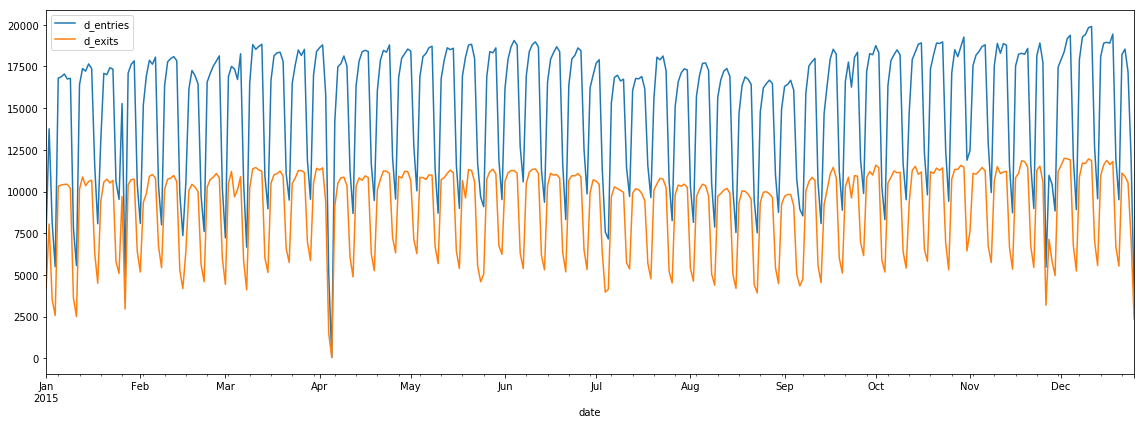

In [15]:
lex2.plot(y=['d_entries', 'd_exits'], figsize=(16, 6))

,d_entries,d_exits,station,line
date,,,,
2015-01-01,7398.0,4184.0,LEXINGTON AVE,NQR456
2015-01-02,13755.0,8050.0,LEXINGTON AVE,NQR456
2015-01-03,8138.0,3522.0,LEXINGTON AVE,NQR456
2015-01-04,5495.0,2569.0,LEXINGTON AVE,NQR456
2015-01-05,16799.0,10314.0,LEXINGTON AVE,NQR456


/opt/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


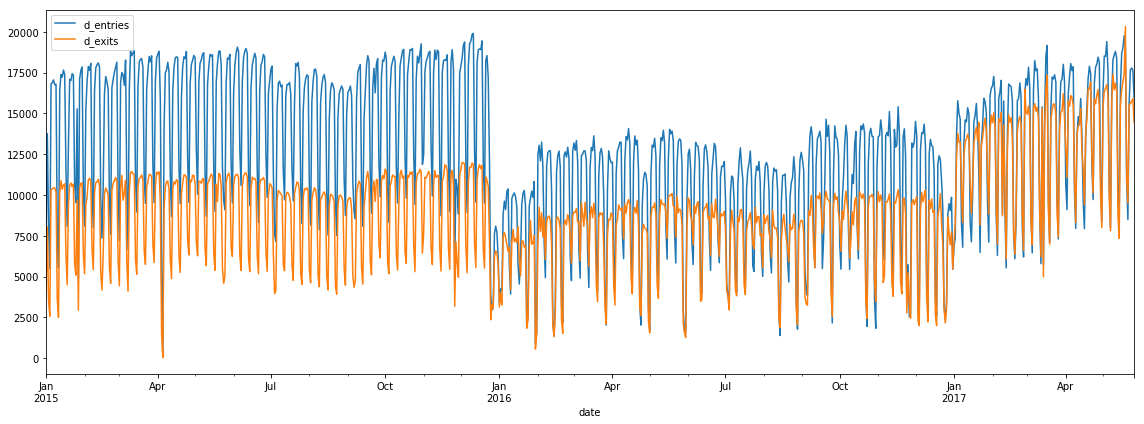

In [35]:
test = pd.concat([lex, lex2], axis=0)
test.sort_index(inplace=True)
test.plot(y=['d_entries', 'd_exits'], figsize=(16, 6))
test.to_csv('stations/LEXINGTON_FULL.csv')
test.head()

In [36]:
test = pd.read_csv('modern/turnstile_141018.txt', header=0)
test[test.STATION.str.contains('LEX')].STATION.unique()

array(['LEXINGTON-53 ST', 'LEXINGTON AVE'], dtype=object)